In [1]:
from landscapes import *
import os
import os.path as osp
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [2]:
def Laplacian_fun(B22_st, B22_stm1, B22_sm1t, B22_sm1tm1, eye):
    # return B22_stm1@B22_sm1t@(eye-B22_st)@B22_sm1t
    # return B22_sm1t@(eye-B22_st)@B22_sm1t@B22_stm1
    # return B22_sm1t@B22_stm1@(eye-B22_st)@B22_stm1
    # return B22_stm1@(eye-B22_st)@B22_stm1@B22_sm1t
    # return B22_sm1tm1-B22_sm1t-B22_stm1+B22_st

    
    # return B22_stm1@B22_sm1t+B22_sm1t@B22_stm1-2*B22_st
    # return eye-B22_st

    # return B22_stm1@(eye-B22_st)@(eye - B22_sm1tm1 + B22_sm1t)

    # Best
    # return B22_sm1t@B22_stm1-B22_st

    # Normal
    return B22_stm1 - B22_st - B22_sm1tm1 + B22_sm1t

LANDSCAPES
---------------------

In [8]:
class LandscapeLoader():
    def __init__(self, path_to_landscapes, epsilons, min_image_i = 0, max_image_i=7000):
        self.path_to_landscapes = path_to_landscapes
        self.epsilons = epsilons
        

        self.location_dict = {}
        self.location_pointers = {}
        for eps in epsilons:
            path_to_landscapes = osp.join(self.path_to_landscapes, f"eps_{eps}")
            self.location_dict[eps] = {}
            self.location_pointers[eps] = {}
            for color in sorted(os.listdir(path_to_landscapes)):
                self.location_dict[eps][color] = {}
                self.location_pointers[eps][color] = {}
                for digit in sorted(os.listdir(osp.join(path_to_landscapes, color))):
                    self.location_dict[eps][color][digit] = {"lap": [], "pers": []}
                    self.location_pointers[eps][color][digit] = {"lap": 0, "pers": 0}
                    for land_file in tqdm(sorted(os.listdir(osp.join(path_to_landscapes, color, digit))), leave=False, desc=f"Processing eps {eps}, {color} {digit} landscapes"):
                        if not land_file.endswith(".pkl") or len(land_file.split("_")) < 4:
                            continue
                        image_i = int(land_file[:-4].split("_")[2])
                        if image_i < min_image_i or image_i > max_image_i:
                            continue
                        self.location_dict[eps][color][digit][land_file.split("_")[0]].append(osp.join(path_to_landscapes, color, digit, land_file))
                        # with open(osp.join(path_to_landscapes, color, digit, land_file), "rb") as f:
                        #     land = pickle.load(f)
                        # if land_file.split("_")[0] == "pers":
                        #     land_dict[eps][color][digit][land_file.split("_")[0]].append(land.__mult__(1))
                        # else:
                        #     land_dict[eps][color][digit][land_file.split("_")[0]].append(land.__mult__(1))

    def reset_pointer(self, eps_list=None, color_list=None, digit_list=None, type_list=None):
        if eps_list is None:
            eps_list = self.location_pointers.keys()
        for eps in eps_list:
            if color_list is None:
                color_list = self.location_pointers[eps].keys()
            for color in color_list:
                if digit_list is None:
                    digit_list = self.location_pointers[eps][color].keys()
                for digit in digit_list:
                    if type_list is None:
                        type_list = ["lap", "pers"]
                    for type_ in type_list:
                        self.location_pointers[eps][color][digit][type_] = 0
                        # self.location_pointers[eps][color][digit]["pers"] = 0

    def load(self, eps, color, digit, type_):
        if self.location_pointers[eps][color][digit][type_] >= len(self.location_dict[eps][color][digit][type_]):
            return None
        path = self.location_dict[eps][color][digit][type_][self.location_pointers[eps][color][digit][type_]]
        self.location_pointers[eps][color][digit][type_] += 1
        with open(path, "rb") as f:
            land = pickle.load(f)
        return land#.__mult__(1) if type_ == "pers" else land
        

In [9]:
LL_train_new_filtration = LandscapeLoader("../mnist_ballmapper_new_filtration/sample_size_7000", [1.5, 2, 2.5, 3], max_image_i=5600)
LL_test_new_filtration = LandscapeLoader("../mnist_ballmapper_new_filtration/sample_size_7000", [1.5, 2, 2.5, 3], min_image_i=5600)

LL_train_old_filtration = LandscapeLoader("../mnist_ballmapper/sample_size_7000", [1.5, 2, 2.5, 3], max_image_i=5600)
LL_test_old_filtration = LandscapeLoader("../mnist_ballmapper/sample_size_7000", [1.5, 2, 2.5, 3], min_image_i=5600)

Processing eps 1.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 1.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 1.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 1.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 1.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 1.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 1.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 1.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 1.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 1.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 1.5, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 1.5, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 1.5, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 1.5, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 1.5, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 1.5, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 1.5, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 1.5, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 1.5, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 1.5, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2.5, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 1.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 1.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 1.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 1.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 1.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 1.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 1.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 1.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 1.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 1.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 1.5, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 1.5, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 1.5, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 1.5, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 1.5, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 1.5, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 1.5, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 1.5, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 1.5, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 1.5, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2.5, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 1.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 1.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 1.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 1.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 1.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 1.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 1.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 1.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 1.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 1.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 1.5, color_y 0 landscapes:   0%|          | 0/1363 [00:00<?, ?it/s]

Processing eps 1.5, color_y 1 landscapes:   0%|          | 0/1693 [00:00<?, ?it/s]

Processing eps 1.5, color_y 2 landscapes:   0%|          | 0/1402 [00:00<?, ?it/s]

Processing eps 1.5, color_y 3 landscapes:   0%|          | 0/1404 [00:00<?, ?it/s]

Processing eps 1.5, color_y 4 landscapes:   0%|          | 0/1341 [00:00<?, ?it/s]

Processing eps 1.5, color_y 5 landscapes:   0%|          | 0/1270 [00:00<?, ?it/s]

Processing eps 1.5, color_y 6 landscapes:   0%|          | 0/1462 [00:00<?, ?it/s]

Processing eps 1.5, color_y 7 landscapes:   0%|          | 0/1518 [00:00<?, ?it/s]

Processing eps 1.5, color_y 8 landscapes:   0%|          | 0/1406 [00:00<?, ?it/s]

Processing eps 1.5, color_y 9 landscapes:   0%|          | 0/1389 [00:00<?, ?it/s]

Processing eps 2, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2, color_y 0 landscapes:   0%|          | 0/2007 [00:00<?, ?it/s]

Processing eps 2, color_y 1 landscapes:   0%|          | 0/2487 [00:00<?, ?it/s]

Processing eps 2, color_y 2 landscapes:   0%|          | 0/2064 [00:00<?, ?it/s]

Processing eps 2, color_y 3 landscapes:   0%|          | 0/2076 [00:00<?, ?it/s]

Processing eps 2, color_y 4 landscapes:   0%|          | 0/1971 [00:00<?, ?it/s]

Processing eps 2, color_y 5 landscapes:   0%|          | 0/1875 [00:00<?, ?it/s]

Processing eps 2, color_y 6 landscapes:   0%|          | 0/2151 [00:00<?, ?it/s]

Processing eps 2, color_y 7 landscapes:   0%|          | 0/2247 [00:00<?, ?it/s]

Processing eps 2, color_y 8 landscapes:   0%|          | 0/2079 [00:00<?, ?it/s]

Processing eps 2, color_y 9 landscapes:   0%|          | 0/2043 [00:00<?, ?it/s]

Processing eps 2.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2.5, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 1.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 1.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 1.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 1.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 1.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 1.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 1.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 1.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 1.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 1.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 1.5, color_y 0 landscapes:   0%|          | 0/1363 [00:00<?, ?it/s]

Processing eps 1.5, color_y 1 landscapes:   0%|          | 0/1693 [00:00<?, ?it/s]

Processing eps 1.5, color_y 2 landscapes:   0%|          | 0/1402 [00:00<?, ?it/s]

Processing eps 1.5, color_y 3 landscapes:   0%|          | 0/1404 [00:00<?, ?it/s]

Processing eps 1.5, color_y 4 landscapes:   0%|          | 0/1341 [00:00<?, ?it/s]

Processing eps 1.5, color_y 5 landscapes:   0%|          | 0/1270 [00:00<?, ?it/s]

Processing eps 1.5, color_y 6 landscapes:   0%|          | 0/1462 [00:00<?, ?it/s]

Processing eps 1.5, color_y 7 landscapes:   0%|          | 0/1518 [00:00<?, ?it/s]

Processing eps 1.5, color_y 8 landscapes:   0%|          | 0/1406 [00:00<?, ?it/s]

Processing eps 1.5, color_y 9 landscapes:   0%|          | 0/1389 [00:00<?, ?it/s]

Processing eps 2, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2, color_y 0 landscapes:   0%|          | 0/2007 [00:00<?, ?it/s]

Processing eps 2, color_y 1 landscapes:   0%|          | 0/2487 [00:00<?, ?it/s]

Processing eps 2, color_y 2 landscapes:   0%|          | 0/2064 [00:00<?, ?it/s]

Processing eps 2, color_y 3 landscapes:   0%|          | 0/2076 [00:00<?, ?it/s]

Processing eps 2, color_y 4 landscapes:   0%|          | 0/1971 [00:00<?, ?it/s]

Processing eps 2, color_y 5 landscapes:   0%|          | 0/1875 [00:00<?, ?it/s]

Processing eps 2, color_y 6 landscapes:   0%|          | 0/2151 [00:00<?, ?it/s]

Processing eps 2, color_y 7 landscapes:   0%|          | 0/2247 [00:00<?, ?it/s]

Processing eps 2, color_y 8 landscapes:   0%|          | 0/2079 [00:00<?, ?it/s]

Processing eps 2, color_y 9 landscapes:   0%|          | 0/2043 [00:00<?, ?it/s]

Processing eps 2.5, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 2.5, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 2.5, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 2.5, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 2.5, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 2.5, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 2.5, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 2.5, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 2.5, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 2.5, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 2.5, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_x 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_x 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_x 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_x 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_x 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_x 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_x 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_x 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_x 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_x 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Processing eps 3, color_y 0 landscapes:   0%|          | 0/1338 [00:00<?, ?it/s]

Processing eps 3, color_y 1 landscapes:   0%|          | 0/1658 [00:00<?, ?it/s]

Processing eps 3, color_y 2 landscapes:   0%|          | 0/1376 [00:00<?, ?it/s]

Processing eps 3, color_y 3 landscapes:   0%|          | 0/1384 [00:00<?, ?it/s]

Processing eps 3, color_y 4 landscapes:   0%|          | 0/1314 [00:00<?, ?it/s]

Processing eps 3, color_y 5 landscapes:   0%|          | 0/1250 [00:00<?, ?it/s]

Processing eps 3, color_y 6 landscapes:   0%|          | 0/1434 [00:00<?, ?it/s]

Processing eps 3, color_y 7 landscapes:   0%|          | 0/1498 [00:00<?, ?it/s]

Processing eps 3, color_y 8 landscapes:   0%|          | 0/1386 [00:00<?, ?it/s]

Processing eps 3, color_y 9 landscapes:   0%|          | 0/1362 [00:00<?, ?it/s]

Mean landscapes
---------------

In [5]:
LL_train = LL_train_old_filtration

In [10]:
def plot_mean_landscape(LL, eps, color, digit, type_, max_k = 3, limits = None, n_eval=1000, errorbar="sd"):
    LL.reset_pointer([eps], [color], [digit], [type_])

    all_evaluations = {0: {k: np.array([]) for k in range(max_k)}, 1: {k: np.array([]) for k in range(max_k)}}
    count = 0

    print(f"Loading landscapes for eps={eps}, color={color}, digit={digit}, type={type_}")
    while True:
        print(f"Loading landscape {count}", end="\r")
        land = LL.load(eps, color, digit, type_)
        if land is None:
            break
        max_t = land.max_t
        count += 1
        for q in range(2):
            for k in range(max_k):
                if k not in land.evaluations[q].keys():
                    all_evaluations[q][k] = np.append(all_evaluations[q][k], np.zeros(n_eval))
                else:
                    all_evaluations[q][k] = np.append(all_evaluations[q][k], land.evaluations[q][k])

    print()
    x_axis = np.array(list(np.linspace(0, max_t, n_eval))*count)

    fig, ax = plt.subplots(1, 2, figsize=(5*2, 5))
        
    for dim in range(0, 2):
        cur_ax = ax[dim]

        for k in range(max_k):
            # max_non_zero = len(self.evaluations[dim])
            # for i in range(len(self.evaluations[dim])-1, -1, -1):
            #     if self.evaluations[dim][k][i] != 0:
            #         max_non_zero = i+1
            #         break
            # ax[dim].plot(np.linspace(0, self.max_t, len(self.evaluations[dim][k]))[:max_non_zero], self.evaluations[dim][k][:max_non_zero], c={0: "b", 1: "r", 2: "g", 3: "y"}[dim])
            print("Plotting k =", k, "dim =", dim, end="\r")
            sns.lineplot(x=x_axis, y=all_evaluations[dim][k], ax=cur_ax, label=f"k={k}", errorbar=errorbar)
        
        if limits is not None:
            if isinstance(limits[0], list):
                if len(limits) > dim:
                    cur_ax.set_xlim(limits[dim][0], limits[dim][1])
                    cur_ax.set_ylim(limits[dim][2], limits[dim][3])
            else:
                cur_ax.set_xlim(limits[0], limits[1])
                cur_ax.set_ylim(limits[2], limits[3])
        cur_ax.legend()
        cur_ax.set_xlabel("t")
        cur_ax.set_ylabel("Landscape")
        if type_ == "lap":
            cur_ax.set_title(f"Lap Landscape dim {dim}")
        else:
            cur_ax.set_title(f"Landscape dim {dim}")
        # cur_ax.set_title(f"Lap Landscape dim {dim}")
    fig.tight_layout()
    return ax

# LL_train.reset_pointer()

# all_evaluations = {0: {}, 1: {}}
# max_k = [-1, -1]
# count = 0

# while True:
#     land = LL_train.load(2, "color_x", "0", "lap")
#     if land is None:
#         break
#     count += 1
#     for q in range(2):
#         for k in land.evaluations[q].keys():
#             if k > max_k[q]:
#                 max_k[q] = k
#                 all_evaluations[q][k] = np.array([])
#             all_evaluations[q][k] = np.append(all_evaluations[q][k], land.evaluations[q][k])


Extended landscapes
--------------------

In [ ]:
LL_inf_train = LandscapeLoader("../mnist_ballmapper_inf/sample_size_7000", [2], max_image_i=5600)
LL_inf_test = LandscapeLoader("../mnist_ballmapper_inf/sample_size_7000", [2], min_image_i=5600)

Processing eps 2, color_y 0 landscapes:   0%|          | 0/669 [00:00<?, ?it/s]

Processing eps 2, color_y 1 landscapes:   0%|          | 0/829 [00:00<?, ?it/s]

Processing eps 2, color_y 2 landscapes:   0%|          | 0/688 [00:00<?, ?it/s]

Processing eps 2, color_y 3 landscapes:   0%|          | 0/692 [00:00<?, ?it/s]

Processing eps 2, color_y 4 landscapes:   0%|          | 0/657 [00:00<?, ?it/s]

Processing eps 2, color_y 5 landscapes:   0%|          | 0/625 [00:00<?, ?it/s]

Processing eps 2, color_y 6 landscapes:   0%|          | 0/717 [00:00<?, ?it/s]

Processing eps 2, color_y 7 landscapes:   0%|          | 0/749 [00:00<?, ?it/s]

Processing eps 2, color_y 8 landscapes:   0%|          | 0/693 [00:00<?, ?it/s]

Processing eps 2, color_y 9 landscapes:   0%|          | 0/681 [00:00<?, ?it/s]

Processing eps 2, color_y 0 landscapes:   0%|          | 0/669 [00:00<?, ?it/s]

Processing eps 2, color_y 1 landscapes:   0%|          | 0/829 [00:00<?, ?it/s]

Processing eps 2, color_y 2 landscapes:   0%|          | 0/688 [00:00<?, ?it/s]

Processing eps 2, color_y 3 landscapes:   0%|          | 0/692 [00:00<?, ?it/s]

Processing eps 2, color_y 4 landscapes:   0%|          | 0/657 [00:00<?, ?it/s]

Processing eps 2, color_y 5 landscapes:   0%|          | 0/625 [00:00<?, ?it/s]

Processing eps 2, color_y 6 landscapes:   0%|          | 0/717 [00:00<?, ?it/s]

Processing eps 2, color_y 7 landscapes:   0%|          | 0/749 [00:00<?, ?it/s]

Processing eps 2, color_y 8 landscapes:   0%|          | 0/693 [00:00<?, ?it/s]

Processing eps 2, color_y 9 landscapes:   0%|          | 0/681 [00:00<?, ?it/s]

Loading landscapes for eps=2, color=color_y, digit=4, type=pers
Loading landscape 518


array([<Axes: title={'center': 'Landscape dim 0'}, xlabel='t', ylabel='Landscape'>,
       <Axes: title={'center': 'Landscape dim 1'}, xlabel='t', ylabel='Landscape'>],
      dtype=object)

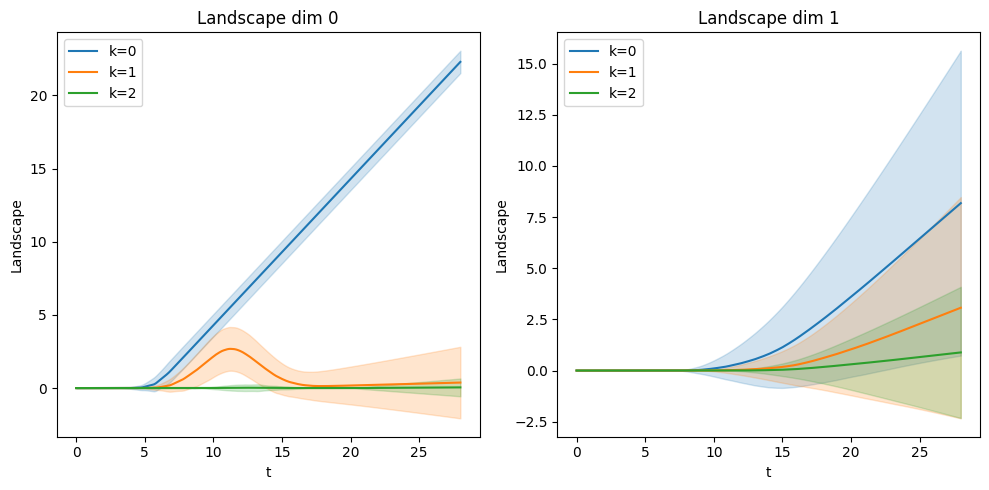

In [15]:
plot_mean_landscape(LL_inf_train, 2, "color_y", "4", "pers")

In [19]:
LL_inf_train.reset_pointer()
mean_landscapes = {}
type_ = "pers"
eps = 2
color = "color_y"

digit_bar = tqdm(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], leave=False)
for digit in digit_bar:
    mean_landscapes[digit] = {}
    digit_bar.set_description(f"Processing landscapes for eps {eps}, color {color}, digit {digit}, type {type_}")
    cur_lands = []
    while True:
        land = LL_inf_train.load(eps, color, digit, type_)
        if land is None:
            break
        cur_lands.append(land)
    mean_landscapes[digit] = np.mean(cur_lands)
                

  0%|          | 0/10 [00:00<?, ?it/s]

In [20]:
classifications_dict = {}

digits = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]




digit_bar = tqdm(digits, leave=False)
for dim in [0, 1, None]:
    LL_inf_test.reset_pointer()
    classifications_dict[dim] = {}
    for digit in digit_bar:
        classifications_dict[dim][digit] = []
        digit_bar.set_description(f"Processing landscapes for dim {dim}, color {color}, digit {digit}")
        while True:
            cur_land_pers = LL_inf_test.load(eps, color, digit, "pers")
            if cur_land_pers is None:
                break
            dists_pers = []
            for other_digit in digits:
                mean_land_pers = mean_landscapes[other_digit]
                dists_pers.append((cur_land_pers - mean_land_pers).norm(dim=dim))
            # print(f"type: {type_}, min dists: {np.min(dists)}, max dists: {np.max(dists)}, mean dists: {np.mean(dists)}")
            classifications_dict[dim][digit].append(np.argmin(dists_pers))

  0%|          | 0/10 [00:00<?, ?it/s]

In [21]:
print("Type\Digit\t" + "\t".join(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]))
for dim in [0, 1, None]:
    print(dim, end="\t\t")
    for digit in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
        # print(f"{digit}\t{type_}", end="\t")
        # print(f"Digit {digit} classification accuracy:")
        print(np.round(np.mean(np.array(classifications_dict[dim][digit]) == int(digit))*100, 1), end="%\t")
    print()
        # print()

Type\Digit	0	1	2	3	4	5	6	7	8	9
0		0.0%	0.6%	50.0%	2.9%	67.1%	3.7%	93.7%	71.4%	59.8%	60.0%	
1		2.8%	0.0%	4.5%	0.0%	0.0%	77.8%	12.0%	1.4%	66.4%	36.9%	
None		8.5%	0.6%	9.1%	0.0%	7.1%	63.0%	47.2%	55.8%	69.7%	44.6%	


Normal landscapes
------------------

Loading landscapes for eps=2, color=color_y, digit=9, type=pers
Loading landscape 551


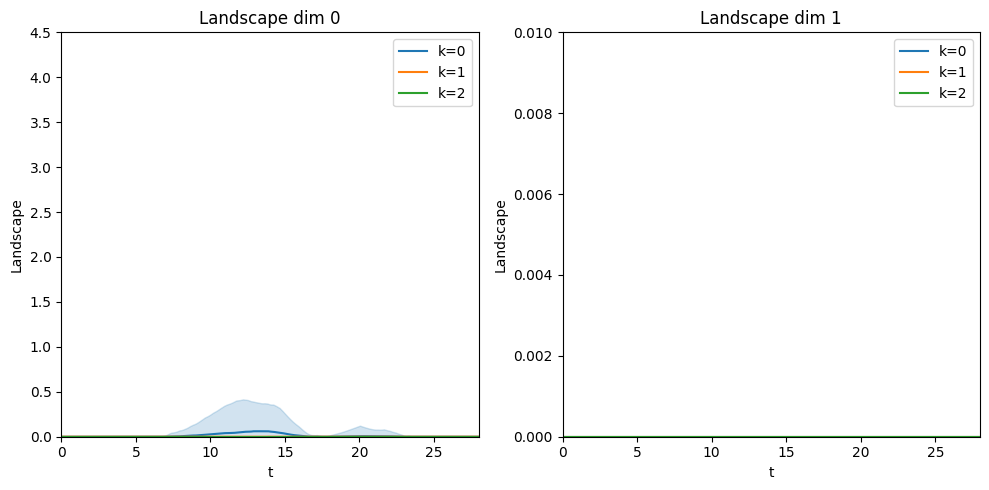

In [15]:
digit = "9"
type_ = "pers"

plot_mean_landscape(LL_train_old_filtration, 2, "color_y", digit, type_, max_k=3, limits=[[0, 28, 0, 4.5], [0, 28, 0, 0.01]])
# plot_mean_landscape(LL_train, 2, "color_y", digit, type_, max_k=3, limits=[[0, 28, 0, 0.8], [0, 28, 0, 0.15]], errorbar="sd")
plt.savefig(f"../figures/mnist_report/mean_landscape_{type_}_{digit}_conf.png", bbox_inches='tight', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: >

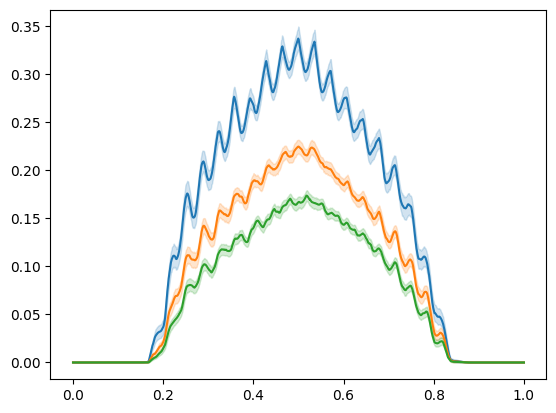

In [ ]:
x_axis = np.array(list(np.linspace(0, land.max_t, 1000))*count)
sns.lineplot(x=x_axis, y=all_evaluations[0][0])
sns.lineplot(x=x_axis, y=all_evaluations[0][1])
sns.lineplot(x=x_axis, y=all_evaluations[0][2])

In [65]:
mean_landscapes = {}

for eps in LL_train.location_dict.keys():
    mean_landscapes[eps] = {}
    for color in LL_train.location_dict[eps].keys():
        mean_landscapes[eps][color] = {}
        digit_bar = tqdm(LL_train.location_dict[eps][color].keys(), leave=False)
        for digit in digit_bar:
            mean_landscapes[eps][color][digit] = {}
            for type_ in ["pers", "lap"]:
                digit_bar.set_description(f"Processing landscapes for eps {eps}, color {color}, digit {digit}, type {type_}")
                cur_lands = []
                while True:
                    land = LL_train.load(eps, color, digit, type_)
                    if land is None:
                        break
                    cur_lands.append(land)
                mean_landscapes[eps][color][digit][type_] = np.mean(cur_lands)
                

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# with open("../mnist_ballmapper_new_filtration/sample_size_7000/mean_landscapes_5600.pkl", "wb") as f:
#     pickle.dump(mean_landscapes, f)
# mean_landscapes

In [4]:
with open("../mnist_ballmapper/sample_size_7000/mean_landscapes_5600.pkl", "rb") as f:
    mean_landscapes_old_filtration = pickle.load(f)

with open("../mnist_ballmapper_new_filtration/sample_size_7000/mean_landscapes_5600.pkl", "rb") as f:
    mean_landscapes_new_filtration = pickle.load(f)

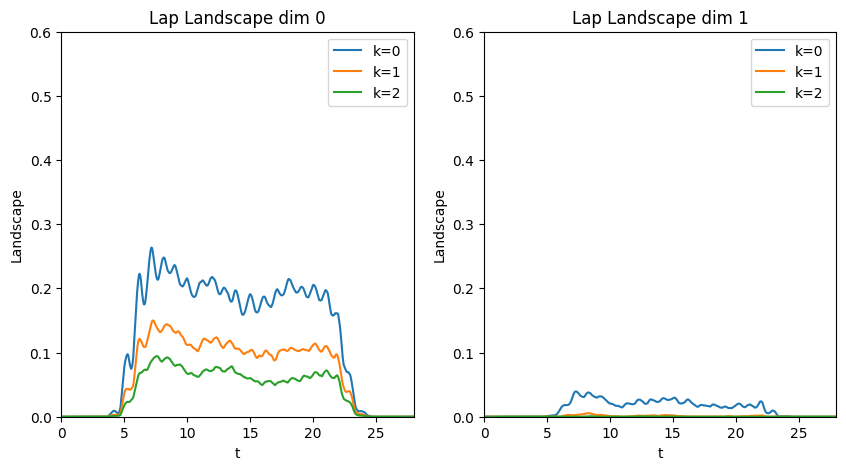

In [21]:
mean_landscapes_old_filtration[2]["color_y"]["3"]["lap"].plot(limits = [0, 28, 0, 0.6])
# plt.savefig("../figures/mnist_report/mean_landscape_lap_0.png", bbox_inches='tight', dpi=300)

In [ ]:
classifications_dict = {}

digits = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

for eps in LL_test.location_dict.keys():
    classifications_dict[eps] = {}
    for color in LL_test.location_dict[eps].keys():
        classifications_dict[eps][color] = {}
        digit_bar = tqdm(LL_test.location_dict[eps][color].keys(), leave=False)
        for digit in digit_bar:
            classifications_dict[eps][color][digit] = {}
            for type_ in ["pers", "lap"]:
                classifications_dict[eps][color][digit][type_] = []
                digit_bar.set_description(f"Processing landscapes for eps {eps}, color {color}, digit {digit}, type {type_}")
                while True:
                    cur_land = LL_test.load(eps, color, digit, type_)
                    if cur_land is None:
                        break
                    dists = []
                    for other_digit in digits:
                        mean_land = mean_landscapes[eps][color][other_digit][type_]
                        dists.append((cur_land - mean_land).norm())
                    classifications_dict[eps][color][digit][type_].append(np.argmin(dists))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [23]:
classifications_dict = {}

digits = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

LL_test_old_filtration.reset_pointer()


for eps in LL_test_old_filtration.location_dict.keys():
    classifications_dict[eps] = {}
    for color in LL_test_old_filtration.location_dict[eps].keys():
        classifications_dict[eps][color] = {}
        digit_bar = tqdm(LL_test_old_filtration.location_dict[eps][color].keys(), leave=False)
        for digit in digit_bar:
            classifications_dict[eps][color][digit] = {}
            for type_ in ["pers", "lap", "both"]:
                classifications_dict[eps][color][digit][type_] = []
            digit_bar.set_description(f"Processing landscapes for eps {eps}, color {color}, digit {digit}")
            while True:
                cur_land_pers = LL_test_old_filtration.load(eps, color, digit, "pers")
                cur_land_lap = LL_test_old_filtration.load(eps, color, digit, "lap")
                if cur_land_pers is None:
                    break
                dists_pers = []
                dists_lap = []
                for other_digit in digits:
                    mean_land_pers = mean_landscapes_old_filtration[eps][color][other_digit]["pers"]
                    mean_land_lap = mean_landscapes_old_filtration[eps][color][other_digit]["lap"]
                    dists_pers.append((cur_land_pers - mean_land_pers).norm())
                    dists_lap.append((cur_land_lap - mean_land_lap).norm())
                # print(f"type: {type_}, min dists: {np.min(dists)}, max dists: {np.max(dists)}, mean dists: {np.mean(dists)}")
                classifications_dict[eps][color][digit]["pers"].append(np.argmin(dists_pers))
                classifications_dict[eps][color][digit]["lap"].append(np.argmin(dists_lap))
                dists_both = (np.array(dists_pers)-np.min(dists_pers))/(np.max(dists_pers)-np.min(dists_pers)) + (np.array(dists_lap)-np.min(dists_lap))/(np.max(dists_lap)-np.min(dists_lap))
                classifications_dict[eps][color][digit]["both"].append(np.argmin(dists_both))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# with open("../mnist_ballmapper/sample_size_7000/classifications_dict_with_combi_5600.pkl", "wb") as f:
#     pickle.dump(classifications_dict, f)

In [37]:
print("Type\Digit\t" + "\t".join(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]))
for type_ in ["pers", "lap", "both"]:
    print(type_, end="\t\t")
    for digit in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
        # print(f"{digit}\t{type_}", end="\t")
        # print(f"Digit {digit} classification accuracy:")
        print(np.round(np.mean(np.array(classifications_dict[2]["color_y"][digit][type_]) == int(digit))*100, 1), end="%\t")
    print()
        # print()

Type\Digit	0	1	2	3	4	5	6	7	8	9
pers		0.0%	98.8%	12.1%	34.1%	79.3%	17.0%	30.3%	17.0%	8.2%	2.3%	
lap		78.2%	48.8%	44.7%	39.1%	64.3%	51.9%	67.6%	61.2%	67.2%	60.8%	
both		73.9%	53.5%	47.7%	41.3%	80.0%	52.6%	63.4%	62.6%	70.5%	68.5%	


In [43]:
type_ = "both"
digit_list = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

print("Digit\Digit\t" + "\t".join(digit_list))
for digit1 in digit_list:
    print(digit1, end="\t\t")
    for digit2 in digit_list:
        # print(f"{digit}\t{type_}", end="\t")
        # print(f"Digit {digit} classification accuracy:")
        print(np.round(np.mean(np.array(classifications_dict[2]["color_y"][digit1][type_]) == int(digit2))*100, 2), end="%\t")
    print()
        # print()

Digit\Digit	0	1	2	3	4	5	6	7	8	9
0		73.94%	0.7%	2.82%	0.0%	4.23%	3.52%	2.11%	0.0%	11.27%	1.41%	
1		1.16%	53.49%	3.49%	5.23%	0.0%	25.0%	0.0%	0.58%	9.88%	1.16%	
2		3.79%	6.82%	47.73%	16.67%	0.0%	14.39%	6.82%	0.0%	3.79%	0.0%	
3		0.72%	8.7%	5.8%	41.3%	0.0%	27.54%	0.72%	0.72%	13.04%	1.45%	
4		2.86%	2.14%	0.0%	0.0%	80.0%	2.14%	0.71%	0.71%	1.43%	10.0%	
5		0.0%	5.19%	3.7%	16.3%	0.0%	52.59%	1.48%	10.37%	5.19%	5.19%	
6		6.34%	0.0%	25.35%	0.0%	1.41%	3.52%	63.38%	0.0%	0.0%	0.0%	
7		0.0%	2.04%	0.68%	1.36%	0.0%	21.09%	0.0%	62.59%	4.08%	8.16%	
8		7.38%	2.46%	0.82%	4.1%	1.64%	2.46%	0.82%	0.82%	70.49%	9.02%	
9		3.85%	2.31%	0.77%	0.0%	2.31%	2.31%	0.77%	15.38%	3.85%	68.46%	


In [106]:
from sklearn.metrics import f1_score

print("eps\tcolor\tType\t\t\tAccuracy\tf1-score")
for eps in [1.5, 2, 2.5, 3]:
    for color in ["color_x", "color_y"]:
        for type_ in ["pers", "lap", "both"]:

            results = np.array([])
            y = np.array([])
            for digit in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
                cur_results = np.array(classifications_dict[eps][color][digit][type_])
                results = np.append(results, cur_results)
                y = np.append(y, np.ones_like(cur_results) * int(digit))

            print(f"{eps}\t{color[-1]}\t{type_}", end="\t\t\t")
            print(f"{np.mean(results==y)*100:.1f}%\t\t{f1_score(y, results, average='weighted'):.3f}")
            # np.mean(results==y), np.std(results==y)

eps	color	Type			Accuracy	f1-score
1.5	x	pers			29.6%		0.267
1.5	x	lap			38.5%		0.371
1.5	x	both			45.5%		0.450
1.5	y	pers			33.2%		0.306
1.5	y	lap			53.2%		0.539
1.5	y	both			56.4%		0.572
2	x	pers			28.2%		0.248
2	x	lap			42.7%		0.409
2	x	both			46.8%		0.456
2	y	pers			32.0%		0.293
2	y	lap			58.2%		0.589
2	y	both			61.2%		0.620
2.5	x	pers			27.6%		0.239
2.5	x	lap			36.4%		0.346
2.5	x	both			43.1%		0.419
2.5	y	pers			30.2%		0.274
2.5	y	lap			50.5%		0.508
2.5	y	both			55.8%		0.563
3	x	pers			25.4%		0.209
3	x	lap			36.4%		0.346
3	x	both			41.3%		0.400
3	y	pers			28.1%		0.250
3	y	lap			45.9%		0.455
3	y	both			50.9%		0.509


Vector from landscapes
-------------------

In [ ]:
LL_all_old_filtration = LandscapeLoader("../mnist_ballmapper/sample_size_7000", [1.5, 2, 2.5, 3])
feature_vector_dict_land = {}

path_to_vecs = "../mnist_ballmapper/sample_size_7000/"

y_target = []
for digit in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
    y_target += [int(digit)]*(len(os.listdir(osp.join(path_to_vecs, "eps_1.5", "color_x", digit)))//2)

# LL_all_old_filtration.reset_pointer()

for eps in [1.5, 2, 2.5, 3]:
    feature_vector_dict_land[eps] = {}
    for color in ["color_x", "color_y"]:
        feature_vector_dict_land[eps][color] = {}
        for type_ in ["pers", "lap"]:
            feature_vector_dict_land[eps][color][type_] = []
            for digit in tqdm(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], desc=f"Processing eps {eps}, {color} feature vectors", leave=False):
                while True:
                    cur_land = LL_all_old_filtration.load(eps, color, digit, type_)
                    if cur_land is None:
                        break
                    feature_vec = []
                    for q in range(2):
                        try:
                            evals = cur_land.sum_k().evaluations[q][0]
                        except:
                            print(f"Error in loading landscape for eps {eps}, color {color}, digit {digit}, type {type_}")
                            # cur_land.plot()
                            # continue
                            raise ValueError
                        feature_vec.append(evals[0:len(evals)-1:3])
                    # print(np.hstack(feature_vec).shape)
                    feature_vector_dict_land[eps][color][type_].append(np.hstack(feature_vec))
            feature_vector_dict_land[eps][color][type_] = np.vstack(feature_vector_dict_land[eps][color][type_])

In [32]:
with open("../mnist_ballmapper/sample_size_7000/feature_vector_dict.pkl", "wb") as f:
    pickle.dump(feature_vector_dict_land, f)

In [31]:
print("eps\tcolor\ttype\t\tAccuracy on test set")
for eps in [1.5, 2, 2.5, 3]:
    for color in ["color_x", "color_y"]:
        for type_ in ["lap", "lap_combi"]:
            # print(f"{eps}\t{color[-1]}\t{type_}", end="\t\t")
            print(f"{eps} & {color[-1]} & {type_}", end=" & ")
            X = feature_vector_dict_land[eps][color][type_]
            y = np.array(y_target)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
            LR_model = LogisticRegression(max_iter=5000, random_state=42)
            LR_model.fit(X_train, y_train)
            print(f"{LR_model.score(X_test, y_test)*100:.1f}%")
            # print(f"Accuracy on test set: {LR_model.score(X_test, y_test)*100:.2f}%")
            # print(f"Accuracy on train set: {LR_model.score(X_train, y_train)*100:.2f}%")
            # print(f"Number of features: {X.shape[1]}")
            # print(f"Number of samples: {X.shape[0]}")

eps	color	type		Accuracy on test set
1.5 & x & lap & 56.8%
1.5 & x & lap_combi & 72.4%
1.5 & y & lap & 75.9%
1.5 & y & lap_combi & 81.9%
2 & x & lap & 53.1%
2 & x & lap_combi & 67.6%
2 & y & lap & 74.3%
2 & y & lap_combi & 81.1%
2.5 & x & lap & 45.0%
2.5 & x & lap_combi & 64.4%
2.5 & y & lap & 61.8%
2.5 & y & lap_combi & 76.9%
3 & x & lap & 42.5%
3 & x & lap_combi & 59.1%
3 & y & lap & 59.8%
3 & y & lap_combi & 75.3%


FEATURE VECTORS
---------------------

In [15]:
feature_vector_dict = {}

path_to_vecs = "../mnist_ballmapper_vectors/sample_size_7000/"

y_target = []
for digit in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
    y_target += [int(digit)]*(len(os.listdir(osp.join(path_to_vecs, "eps_1.5", "color_x", digit)))//2)

for eps in [1.5, 2, 2.5, 3]:
    feature_vector_dict[eps] = {}
    for color in ["color_x", "color_y"]:
        feature_vector_dict[eps][color] = {}
        for type_ in ["mult", "pers"]:
            feature_vector_dict[eps][color][type_] = []
            for digit in tqdm(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], desc=f"Processing eps {eps}, {color} feature vectors", leave=False):
                for vector_file in sorted(os.listdir(osp.join(path_to_vecs, f"eps_{eps}", color, digit))):
                    if vector_file.split("_")[0] != type_:
                        continue
                    feature_vector_dict[eps][color][type_].append(np.load(osp.join(path_to_vecs, f"eps_{eps}", color, digit, vector_file)))
            feature_vector_dict[eps][color][type_] = np.vstack(feature_vector_dict[eps][color][type_])

Processing eps 1.5, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 1.5, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 1.5, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 1.5, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2.5, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2.5, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2.5, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 2.5, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 3, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 3, color_x feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 3, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

Processing eps 3, color_y feature vectors:   0%|          | 0/10 [00:00<?, ?it/s]

In [29]:
non_zero_features_mult = set()
for eps in [1.5, 2, 2.5, 3]:
    for color in ["color_x", "color_y"]:
        
        for i in range(feature_vector_dict[eps][color]["mult"].shape[1]):
            if np.max(feature_vector_dict[eps][color]["mult"][:, i]) > 1e-5:
                non_zero_features_mult.add(i)
                # print(f"Removing feature {i} from {eps}, {color} mult feature vector")
                # feature_vector_dict[eps][color]["mult"] = np.delete(feature_vector_dict[eps][color]["mult"], i, axis=1)

        feature_vector_dict[eps][color]["combi"] = []
        sum_i = 0
        for q in range(2):
            sum_i = 434*q
            for i in range(29, 0, -1):
                sum_i += i
                # print(f"Sum of integers from 1 to 29: {sum_i}")
                feature_vector_dict[eps][color]["mult_combi"] = deepcopy(feature_vector_dict[eps][color]["mult"])
                feature_vector_dict[eps][color]["mult_combi"][:, sum_i] = feature_vector_dict[eps][color]["pers"][:,sum_i]
                feature_vector_dict[eps][color]["combi"].append(feature_vector_dict[eps][color]["pers"][:,sum_i])
        feature_vector_dict[eps][color]["combi"] = np.vstack(feature_vector_dict[eps][color]["combi"]).T
        feature_vector_dict_land[eps][color]["lap_combi"] = deepcopy(feature_vector_dict_land[eps][color]["lap"] )
        feature_vector_dict_land[eps][color]["lap_combi"] = np.hstack((feature_vector_dict_land[eps][color]["lap"], feature_vector_dict[eps][color]["combi"]))
    # plt.plot(feature_vector_dict[2.5]["color_x"]["mult"][:, sum_i])


In [30]:
feature_vector_dict_land[2.5]["color_x"]["lap_combi"].shape

(7000, 724)

In [17]:
with open("../mnist_ballmapper_vectors/sample_size_7000/feature_vector_dict.pkl", "wb") as f:
    pickle.dump(feature_vector_dict, f)

In [98]:
non_zero_features_mult_combi = deepcopy(non_zero_features_mult)
for q in range(2):
            sum_i = 434*q
            for i in range(29, 0, -1):
                sum_i += i
                non_zero_features_mult_combi.add(sum_i)
print(f"Number of non-zero features in mult: {len(non_zero_features_mult)}")
print(f"Number of non-zero features in mult_combi: {len(non_zero_features_mult_combi)}")

Number of non-zero features in mult: 546
Number of non-zero features in mult_combi: 589


In [62]:
feature_vector_dict[2.5]["color_x"]["combi"].shape

(58, 7000)

In [26]:
print("eps\tcolor\ttype\t\tAccuracy on test set")
for eps in [1.5, 2, 2.5, 3]:
    for color in ["color_x", "color_y"]:
        for type_ in ["mult", "pers", "combi"]:
            print(f"{eps}\t{color[-1]}\t{type_}", end="\t\t")
            X = feature_vector_dict[eps][color][type_]#[:, np.array(list(non_zero_features_mult))]
            y = np.array(y_target)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
            LR_model = LogisticRegression(max_iter=5000, random_state=42)
            LR_model.fit(X_train, y_train)
            print(f"{LR_model.score(X_test, y_test)*100:.1f}%")
            # print(f"Accuracy on test set: {LR_model.score(X_test, y_test)*100:.2f}%")
            # print(f"Accuracy on train set: {LR_model.score(X_train, y_train)*100:.2f}%")
            # print(f"Number of features: {X.shape[1]}")
            # print(f"Number of samples: {X.shape[0]}")

eps	color	type		Accuracy on test set
1.5	x	mult		42.93%
1.5	x	pers		65.14%
1.5	x	combi		52.86%
1.5	y	mult		66.36%
1.5	y	pers		77.36%
1.5	y	combi		67.50%
2	x	mult		42.29%
2	x	pers		64.50%
2	x	combi		51.43%
2	y	mult		60.86%
2	y	pers		75.21%
2	y	combi		68.21%
2.5	x	mult		36.43%
2.5	x	pers		62.00%
2.5	x	combi		46.50%
2.5	y	mult		58.00%
2.5	y	pers		75.43%
2.5	y	combi		66.00%
3	x	mult		40.71%
3	x	pers		57.79%
3	x	combi		43.86%
3	y	mult		58.00%
3	y	pers		75.57%
3	y	combi		66.07%
